In [1]:
from qiskit import QuantumCircuit, Aer, assemble, transpile
from qiskit.visualization import plot_histogram

# Algorithme de Grover

In [2]:
n = 3
N = 2**n

## Étape 1 : Initialisation du circuit

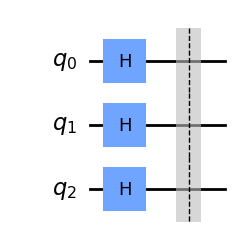

In [3]:
circ = QuantumCircuit(n)
for i in range(n):
    circ.h(i)

circ.barrier()
circ.draw('mpl')

## Étape 2 : Marquage de l'état recherché
Ici, on recherche l'état 110

In [4]:
circ.x(0)
circ.barrier()
circ.draw('mpl')

## Étape 3 : Création du modèle Grover

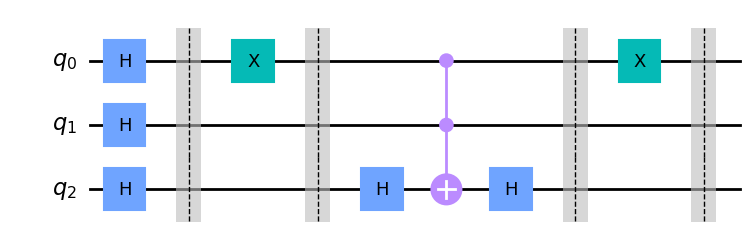

In [5]:
circ.h(n-1)
circ.mct([i for i in range(n-1)], n-1)
circ.h(n-1)
circ.barrier()

circ.x(0)
circ.barrier()
circ.draw('mpl')

## Étape 4 : Première étape de l'opérateur de diffusion de Grover

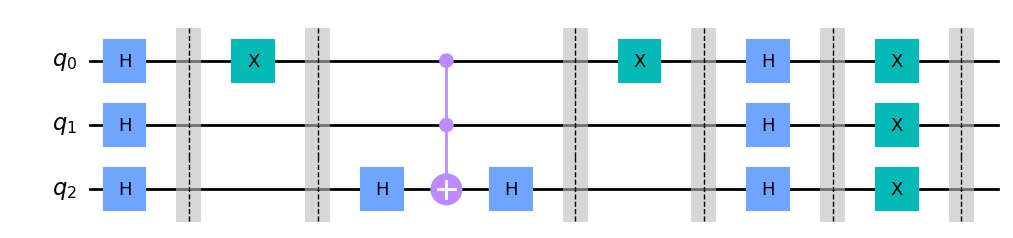

In [6]:
for i in range(n):
    circ.h(i)
circ.barrier()
for i in range(n):
    circ.x(i)
circ.barrier()
circ.draw('mpl')

## Étape 5 : Deuxième étape de l'opérateur de diffusion de Grover pour inverser la moyennne

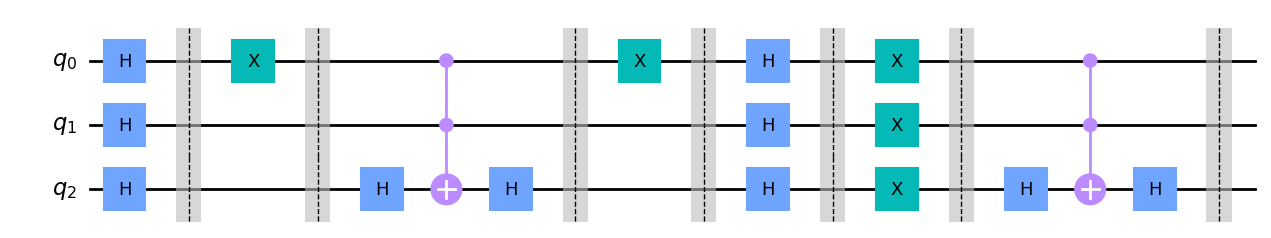

In [7]:
circ.h(n-1)
circ.mct([i for i in range(n-1)], n-1)
circ.h(n-1)
circ.barrier()

circ.draw('mpl')

## Étape 6

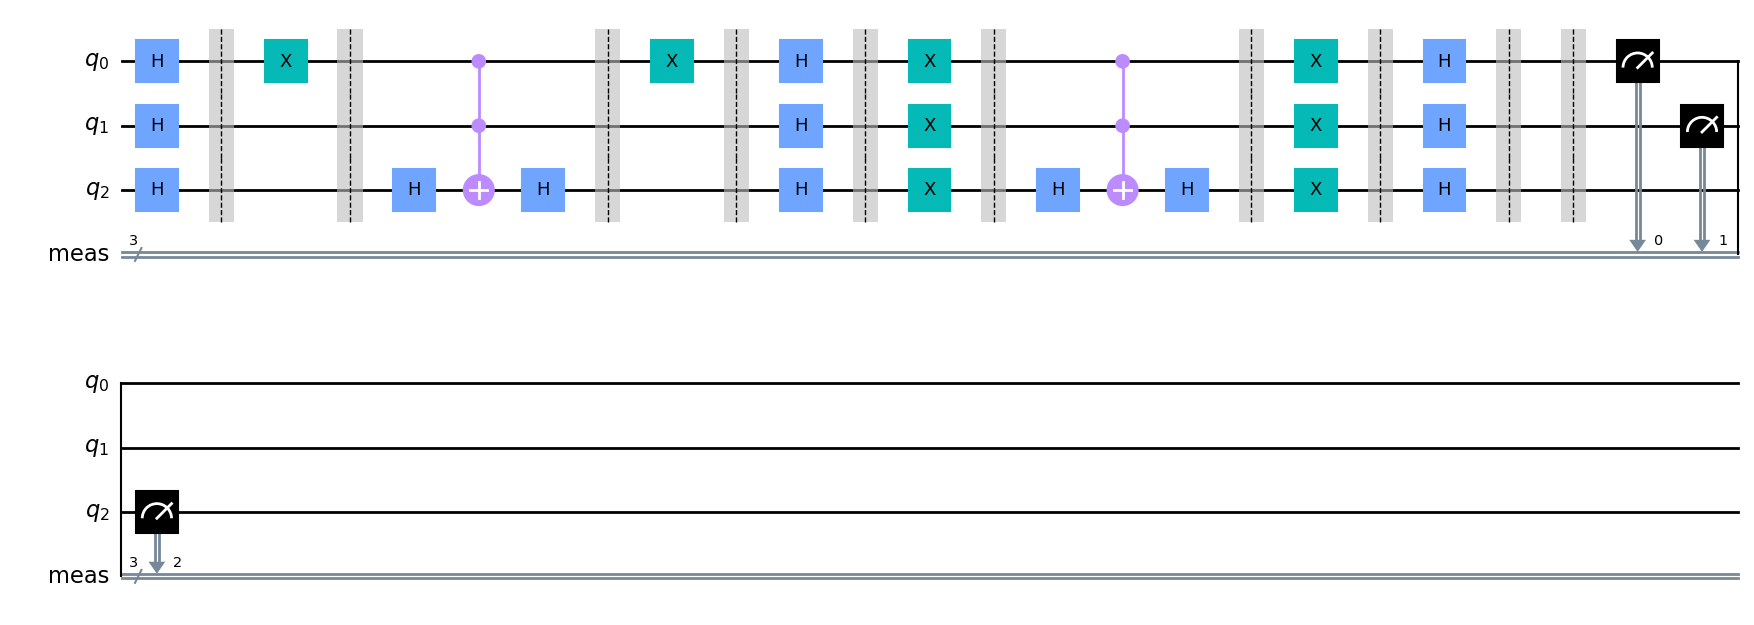

In [8]:
for i in range(n):
    circ.x(i)
circ.barrier()
for i in range(n):
    circ.h(i)
circ.barrier()

circ.measure_all()
circ.draw('mpl')

## Étape 7 : Mesure des qubits

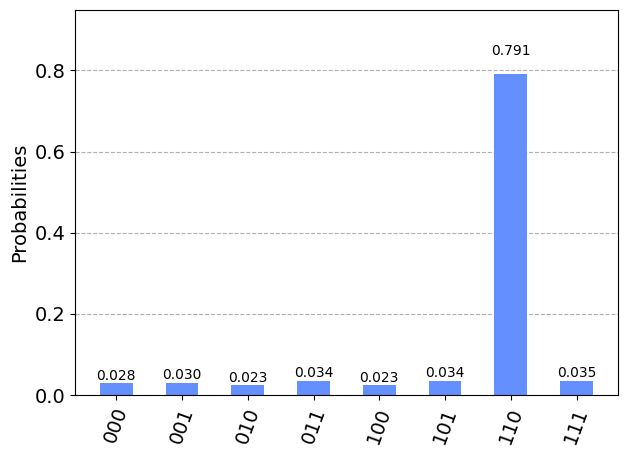

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circ, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [10]:
def Grover(etat, rep):
    #N = 2**n
    n = len(etat)
    circ = QuantumCircuit(n)
    for i in range(n):
        circ.h(i)
    circ.barrier()
    for k in range(rep):

        for i in range(len(etat)):
            if etat[i] == '0':
                circ.x(n-1-i)
        #circ.x(1)
        circ.barrier()

        circ.h(n-1)
        circ.mct([i for i in range(n-1)], n-1)
        circ.h(n-1)
        circ.barrier()
        for i in range(len(etat)):
            if etat[i] == '0':
                circ.x(n-1-i)
        circ.barrier()

        for i in range(n):
            circ.h(i)
        circ.barrier()
        for i in range(n):
            circ.x(i)
        circ.barrier()

        circ.h(n-1)
        circ.mct([i for i in range(n-1)], n-1)
        circ.h(n-1)
        circ.barrier()

        for i in range(n):
            circ.x(i)
        circ.barrier()
        for i in range(n):
            circ.h(i)
        circ.barrier()


    circ.measure_all()
    return circ

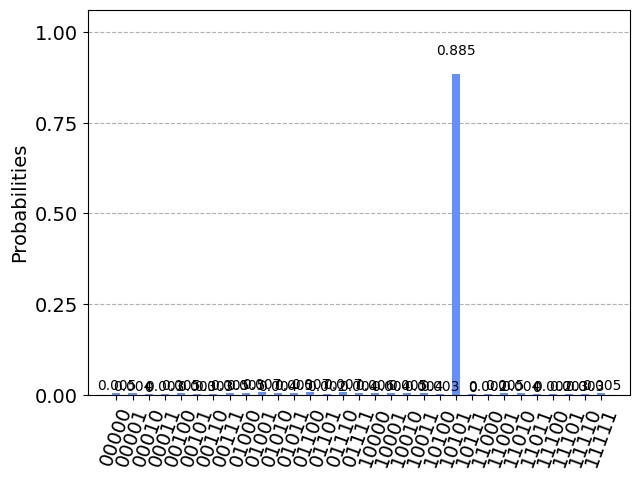

In [22]:
circ = Grover('10101', 3)
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circ, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

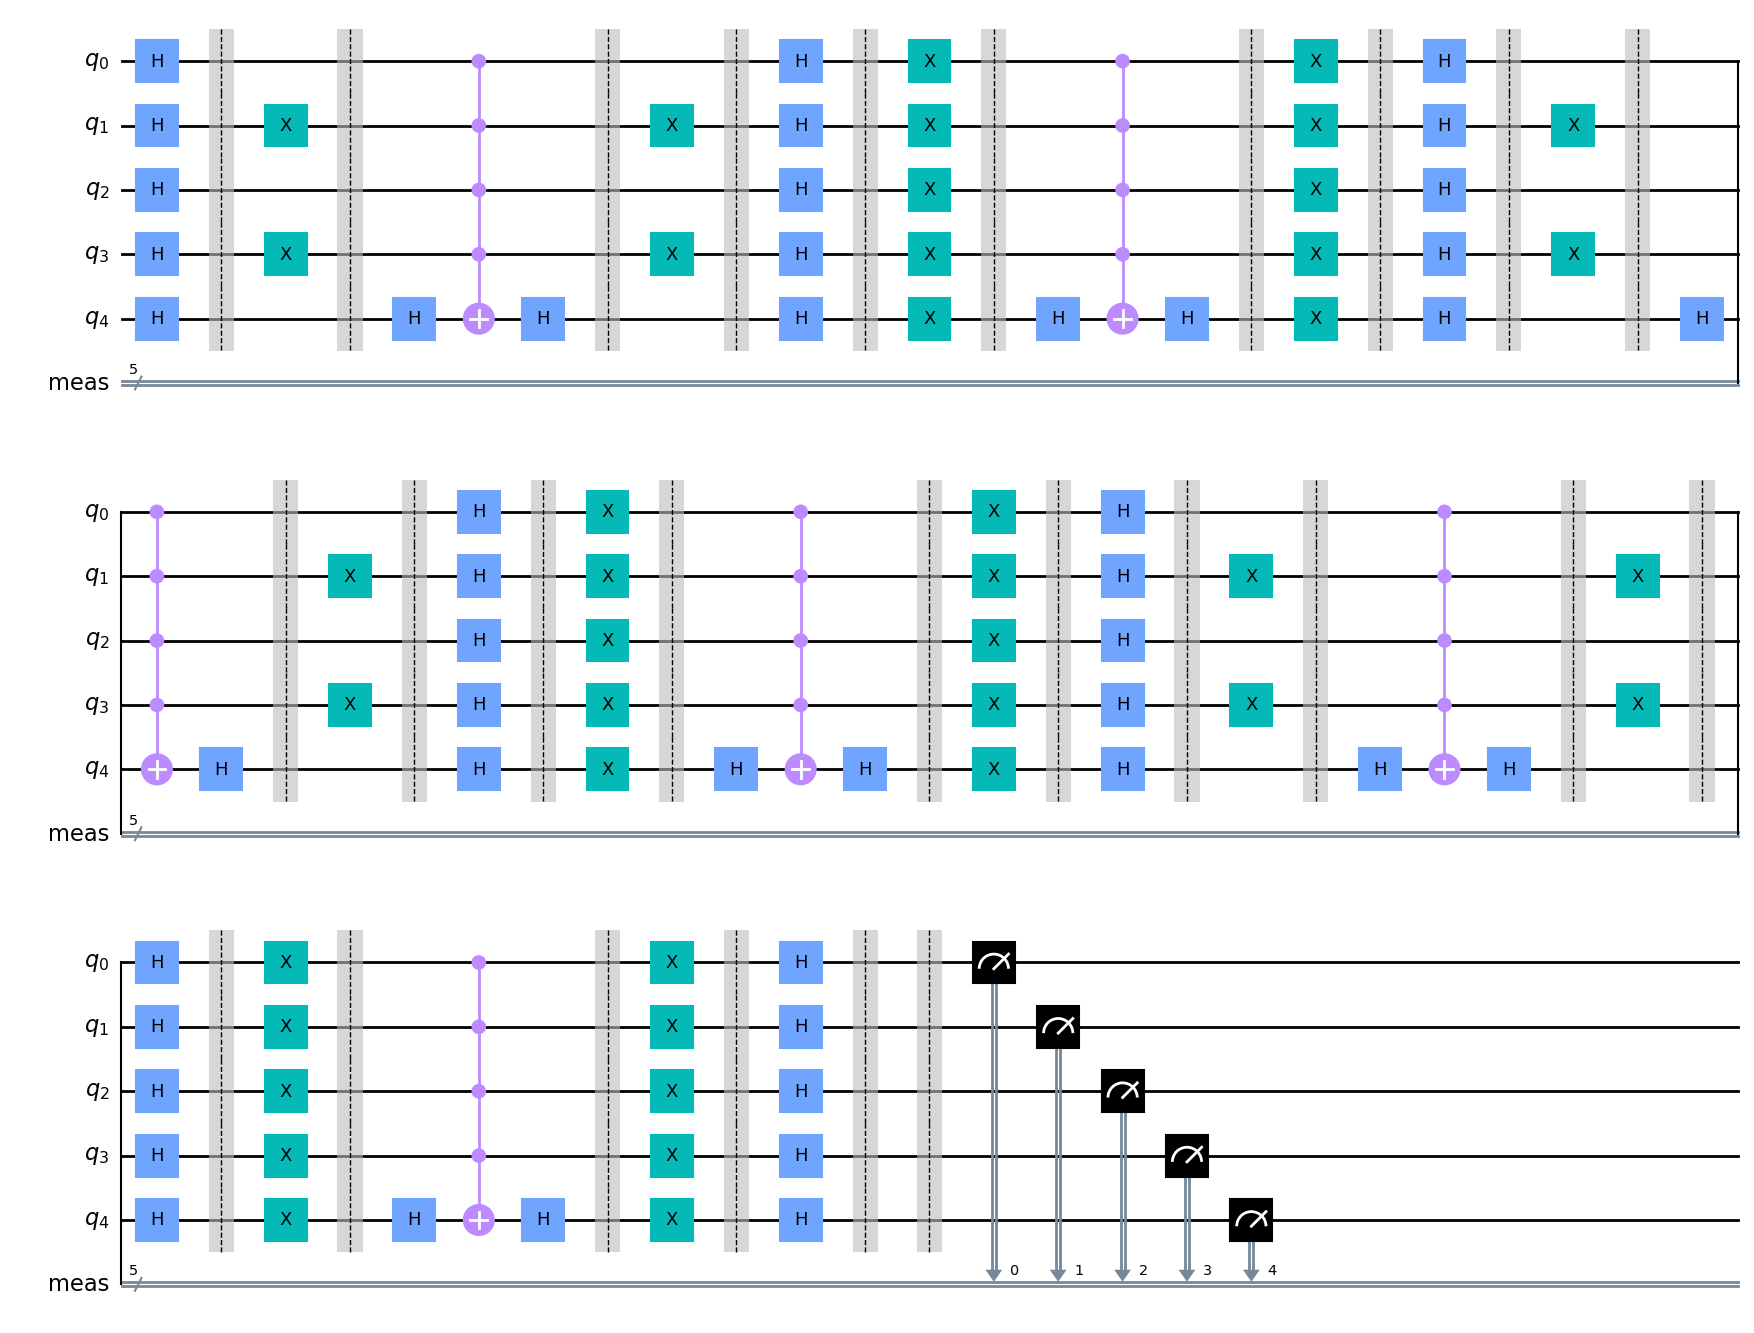

In [23]:
circ.draw('mpl')

Pour trouver l'état |10101>, 3 itérations de l'algorithme suffisent, cela donne une probabilité d'environ 85%.